# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np
import random

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
image_shape = image.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes,indexes,n_occurences_per_class = np.unique(y_train,return_counts=True,return_index=True)

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

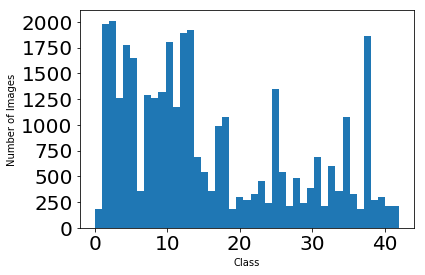

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
#import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, bins = n_classes)
bins = np.linspace(0, 5, 43)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.show()

Sign Class 0


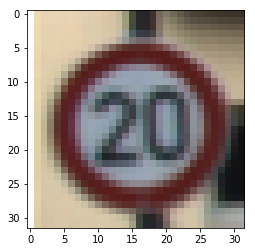

Sign Class 1


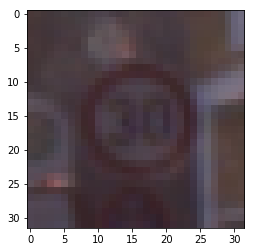

Sign Class 2


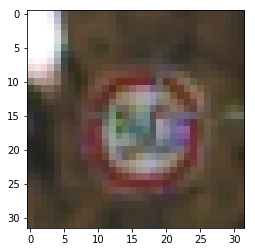

Sign Class 3


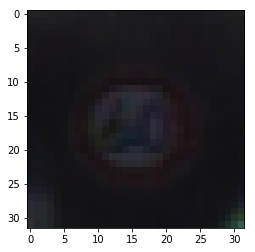

Sign Class 4


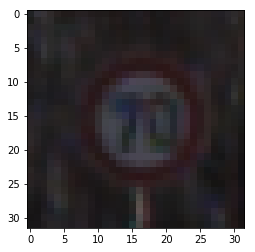

Sign Class 5


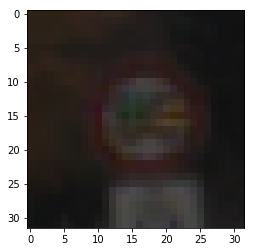

Sign Class 6


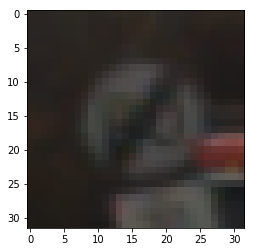

Sign Class 7


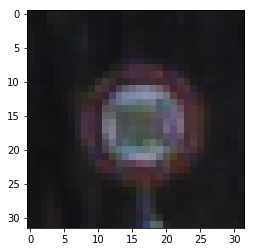

Sign Class 8


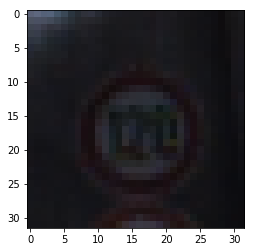

Sign Class 9


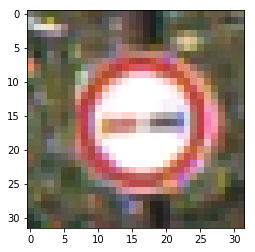

Sign Class 10


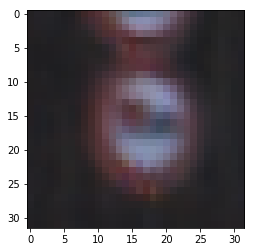

Sign Class 11


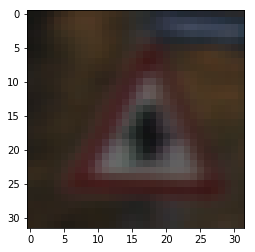

Sign Class 12


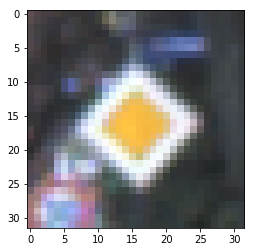

Sign Class 13


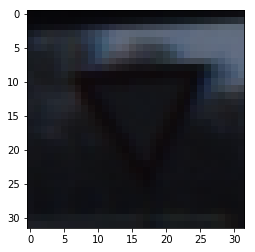

Sign Class 14


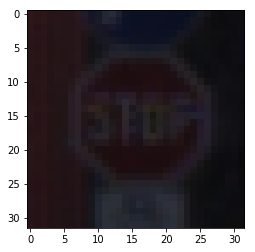

Sign Class 15


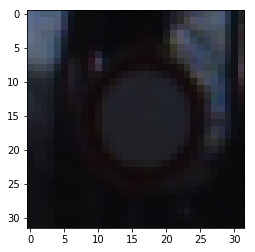

Sign Class 16


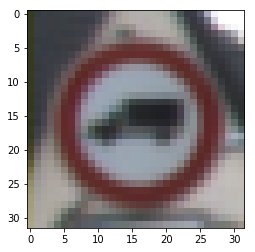

Sign Class 17


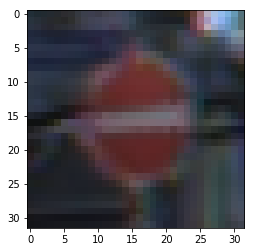

Sign Class 18


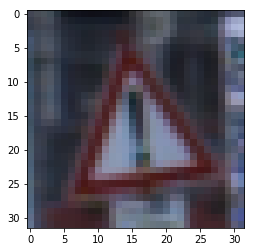

Sign Class 19


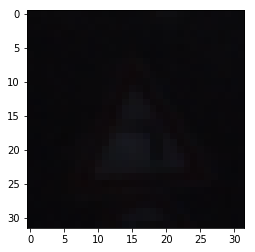

Sign Class 20


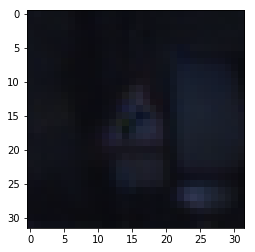

Sign Class 21


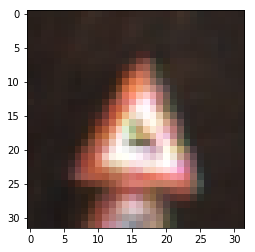

Sign Class 22


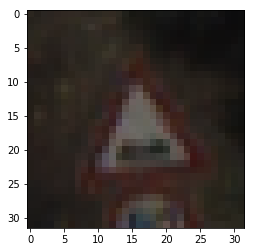

Sign Class 23


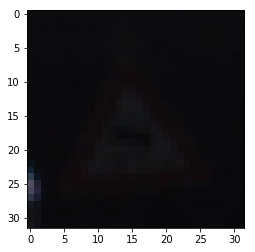

Sign Class 24


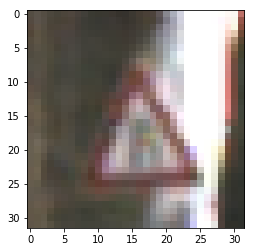

Sign Class 25


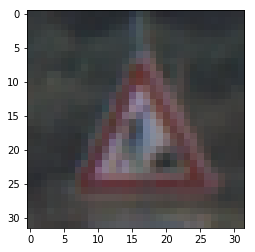

Sign Class 26


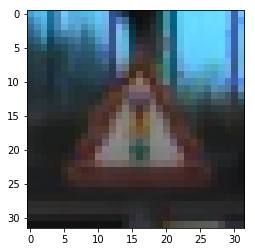

Sign Class 27


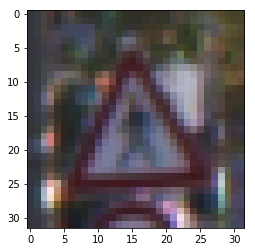

Sign Class 28


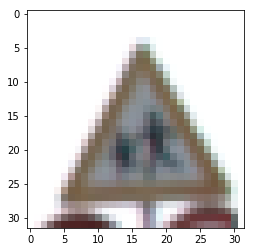

Sign Class 29


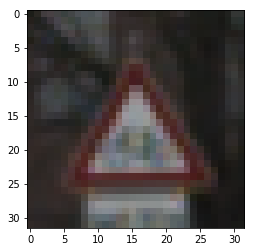

Sign Class 30


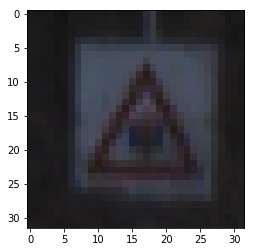

Sign Class 31


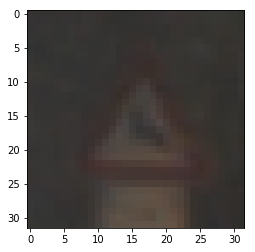

Sign Class 32


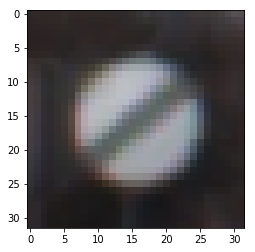

Sign Class 33


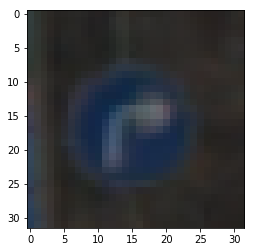

Sign Class 34


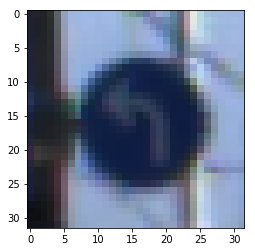

Sign Class 35


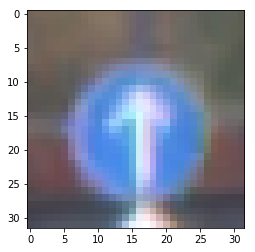

Sign Class 36


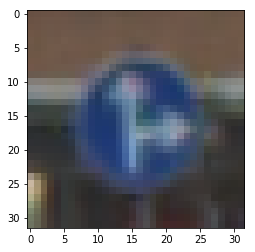

Sign Class 37


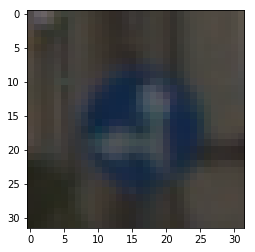

Sign Class 38


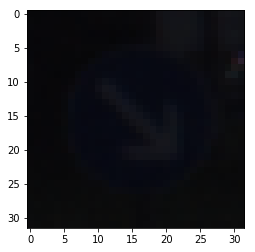

Sign Class 39


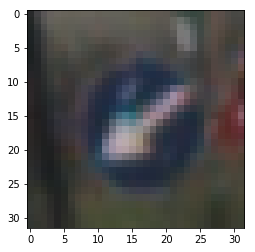

Sign Class 40


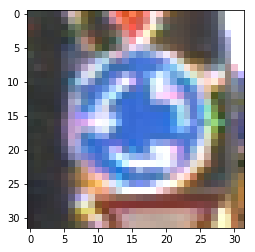

Sign Class 41


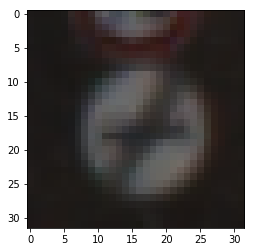

Sign Class 42


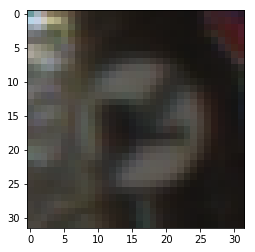

In [4]:
# Display one sign image from each class
for i in indexes:
    print('Sign Class',y_train[i])
    plt.imshow(X_train[i])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import cv2

# Normalizes the data between -1 and 1 instead of 0 to 255    
def normalize(input_set):
    return (input_set / 127.5) - 1

def convert_to_grayscale(input_set):
    gray_images = []
    for image in input_set:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_image)       
    return np.array(gray_images)

# Data augmentation and transformation by vxy10 -> https://github.com/vxy10/ImageAugmentation

# Enhance brightness for low light images
def augment_brightness_camera_images(image):
    #image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = image
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    #image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    image1 = image
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
        img = augment_brightness_camera_images(img)

    return img

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import random

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

augmented_images_array=[]
augmented_labels_array=[]
number_of_occurrences = 1000
limit_number_of_images = 2500

# Instead of doing data augmentation for the entire data set, just do it
# for the classes with the lowest representation - changed my mind and now I level all the images to a specific number

# For each image of any given class I will generate n new images using the 
# formula: (limit_number_of_images - number_of_examples_of_the_class)/number_of_examples_of_the_class
# I do this to have a balanced set of augmented data, and also because this had a better validation and
# test accuracy than when I used the transformation technique
for n,j in enumerate(indexes):
    #if n_occurences_per_class[n] < number_of_occurrences:
    index = j #
    #image = X_train[index]
    number_of_new_images = limit_number_of_images - n_occurences_per_class[n]
    number_of_new_images_per_image = np.ceil(number_of_new_images/n_occurences_per_class[n])
    print('',number_of_new_images,'New images for sign class:',n,'at index:',j)
    k = 0
    while(k < number_of_new_images):
        image = X_train[index]
        for i in range(number_of_new_images_per_image.astype(np.int64)):
            #img = transform_image(image,20,10,5,brightness=1) # Use vxy10's image transformation and brightness augmentation
            #img = augment_brightness_camera_images(image)
            augmented_images_array.append(image)
            augmented_labels_array.append(y_train[j])
        k = k+number_of_new_images_per_image
        index = index+1
        #print(k)
        
print('Finished Data Augmentation...')

print('Image shape: ',image.shape)

X_train = np.append(X_train, np.array(augmented_images_array), axis=0)
y_train = np.append(y_train, np.array(augmented_labels_array), axis=0)

print('New total number of images:',len(X_train))

# Normalize the data
# Normalize the training set
X_train = normalize(X_train)

# Normalize the validation set
X_valid = normalize(X_valid)

# Normalize the testing set
X_test = normalize(X_test)

 2320 New images for sign class: 0 at index: 9960
 520 New images for sign class: 1 at index: 2220
 490 New images for sign class: 2 at index: 31439
 1240 New images for sign class: 3 at index: 5370
 730 New images for sign class: 4 at index: 6810
 850 New images for sign class: 5 at index: 12360
 2140 New images for sign class: 6 at index: 21450
 1210 New images for sign class: 7 at index: 23730
 1240 New images for sign class: 8 at index: 15870
 1180 New images for sign class: 9 at index: 11040
 700 New images for sign class: 10 at index: 17130
 1330 New images for sign class: 11 at index: 8580
 610 New images for sign class: 12 at index: 27329
 580 New images for sign class: 13 at index: 21810
 1810 New images for sign class: 14 at index: 29219
 1960 New images for sign class: 15 at index: 29909
 2140 New images for sign class: 16 at index: 5010
 1510 New images for sign class: 17 at index: 30449
 1420 New images for sign class: 18 at index: 20370
 2320 New images for sign class: 19

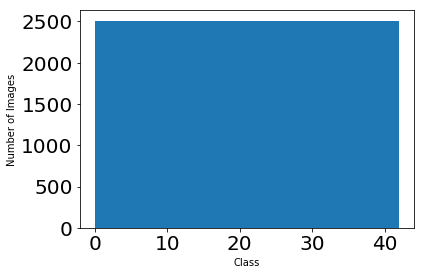

Number of training examples after split: 107576
Number of validation examples: 4410
Number of testing examples: 12630


In [7]:
# Graphical visualisation of the data augmentation effect
plt.hist(y_train, bins = n_classes)
bins = np.linspace(0, 5, 43)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.show()

# Split the augmented training set to create the validation set (augmented)
from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=43)
print("Number of training examples after split:",len(X_train))
print("Number of validation examples:",len(X_valid))
print("Number of testing examples:",len(X_test))
# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Images are in color, input depth should be 3, 
    # representing RGB (Red Green Blue) color channels
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Prevent overfitting by using dropout
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Prevent overfitting by using dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    # traffic sign classifier has 43 Classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1 # return conv1 for the outputFeatureMap


# Must match the shapes of the input and output shapes to those of the data set,
# 3 for input and 43 for output
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits,conv1 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


# Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print(num_examples)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

107576
Training...

EPOCH 1 ...
Validation Accuracy = 0.843

EPOCH 2 ...
Validation Accuracy = 0.900

EPOCH 3 ...
Validation Accuracy = 0.912

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.936

EPOCH 6 ...
Validation Accuracy = 0.938

EPOCH 7 ...
Validation Accuracy = 0.946

EPOCH 8 ...
Validation Accuracy = 0.941

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.951

Model saved


In [10]:
# Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 4)


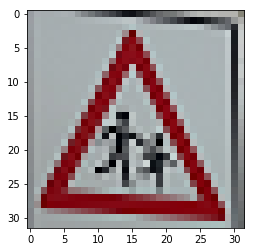

(32, 32, 4)


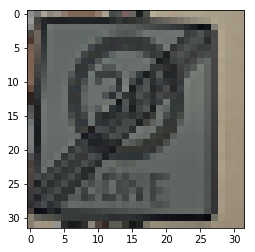

(32, 32, 4)


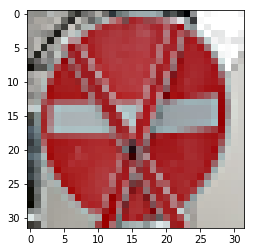

(32, 32, 4)


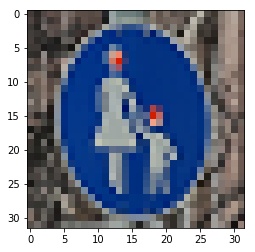

(32, 32, 4)


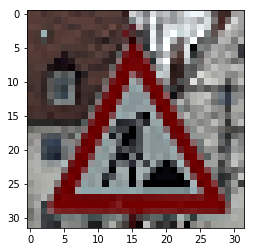

Confirm shape (5, 32, 32, 3)


In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os

directory = '32x32_signs/'
all_images = os.listdir(directory)
x_train_images = []

for file in all_images:
    img_path = directory+file
    image = mpimg.imread(img_path)
    print(image.shape)
    # slice, the image has a 32,32,4 shape
    #x_train_images.append(image[:,:,:-1])
    if image.shape == (32,32,4):
        x_train_images.append(image[:,:,:-1])
    else:
        x_train_images.append(image)
    plt.imshow(image)
    plt.show()

#print(x_train_images[0].shape)
x_train_images = np.array(x_train_images)
print('Confirm shape',x_train_images.shape)
#x_train_images = normalize(x_train_images)

# Labels corresponding to the correct signs, use later to analyze the performance, 
# some signs do not exist on the test set
#labels = [28,6,6,38,17,9,15,10,27,25,40,0,2,14,34]
labels = [28,6,17,27,25]
labels = np.array(labels)

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(softmax_logits, feed_dict={x: x_train_images, keep_prob: 1.0})
    probabilities = sess.run(top_k, feed_dict={x: x_train_images, keep_prob: 1.0})

Image 0 Sign class: 25 Certainty = 95.242%


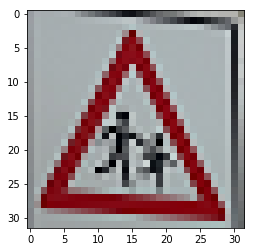

Image 1 Sign class: 6 Certainty = 34.571%


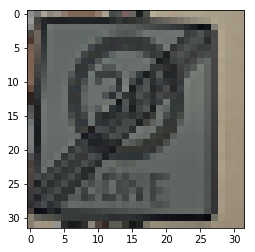

Image 2 Sign class: 17 Certainty = 97.882%


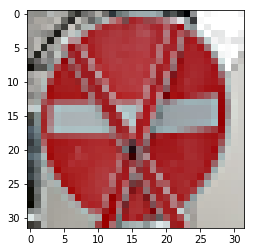

Image 3 Sign class: 34 Certainty = 70.753%


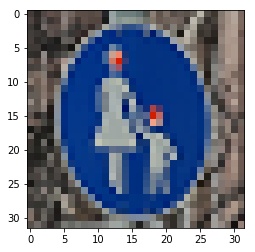

Image 4 Sign class: 25 Certainty = 100.000%


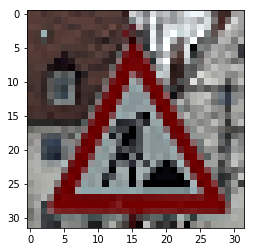

In [13]:
for i,image in enumerate(x_train_images):
    print('Image', i, 'Sign class:',probabilities[1][i][0], 'Certainty = {:.3f}%'.format(100*probabilities[0][i][0]))
    plt.imshow(image)
    plt.show()

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(x_train_images, labels)
    print("Test Accuracy = {:.0f}%".format(100*test_accuracy))

Test Accuracy = 60%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Image 0
Sign class: 25 Probability = 95.2%
Sign class: 29 Probability = 4.4%
Sign class: 24 Probability = 0.3%
Sign class: 23 Probability = 0.0%
Sign class: 20 Probability = 0.0%


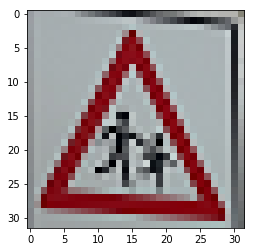

Image 1
Sign class: 6 Probability = 34.6%
Sign class: 32 Probability = 28.4%
Sign class: 0 Probability = 10.0%
Sign class: 40 Probability = 8.0%
Sign class: 3 Probability = 5.1%


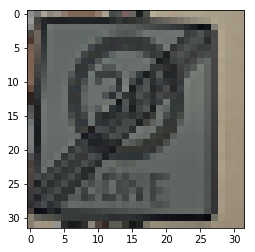

Image 2
Sign class: 17 Probability = 97.9%
Sign class: 14 Probability = 1.2%
Sign class: 30 Probability = 0.4%
Sign class: 12 Probability = 0.2%
Sign class: 10 Probability = 0.1%


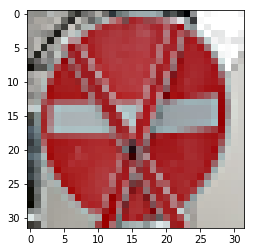

Image 3
Sign class: 34 Probability = 70.8%
Sign class: 38 Probability = 23.6%
Sign class: 35 Probability = 4.3%
Sign class: 33 Probability = 0.7%
Sign class: 37 Probability = 0.4%


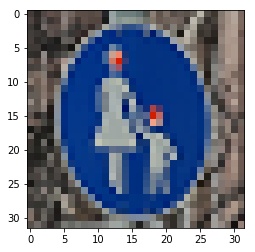

Image 4
Sign class: 25 Probability = 100.0%
Sign class: 29 Probability = 0.0%
Sign class: 26 Probability = 0.0%
Sign class: 19 Probability = 0.0%
Sign class: 24 Probability = 0.0%


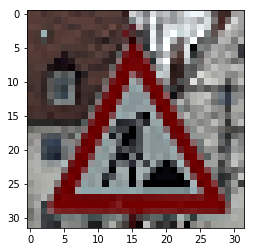

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
#print(len(probabilities[0]))
for i,image in enumerate(x_train_images):
    print('Image', i)
    for j in range(len(probabilities[0])):
        print('Sign class:',probabilities[1][i][j], 'Probability = {:.1f}%'.format(100*probabilities[0][i][j]))
    plt.imshow(image)
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)


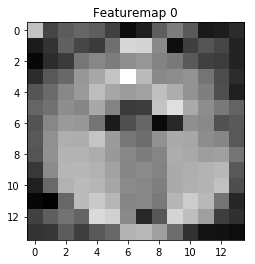

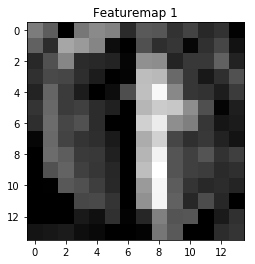

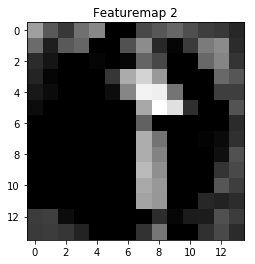

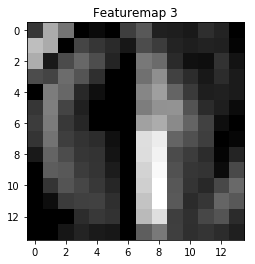

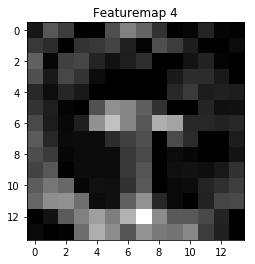

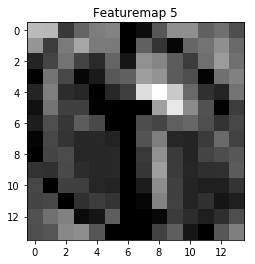

In [16]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# Use the first image of the test set and output the feature map of the first convolution layer
image_array = []
image_array.append(X_test[9])
image_input = np.array(image_array)

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input = normalize(image_input) # The image provided is already normalized
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    #plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        #plt.subplot(6,3, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('Featuremap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.show()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(conv1)
    plt.title('Original Image')
    plt.imshow(image_input[0].squeeze())
    outputFeatureMap(image_input,conv1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 